Exp2021-10-03/2
## Sugar production under short- and long-day light regime



***Motivation***: Clock mutants can show different metabolic performance under different light conditions

Author: Ines Boehm, Tomasz Zieliński

---



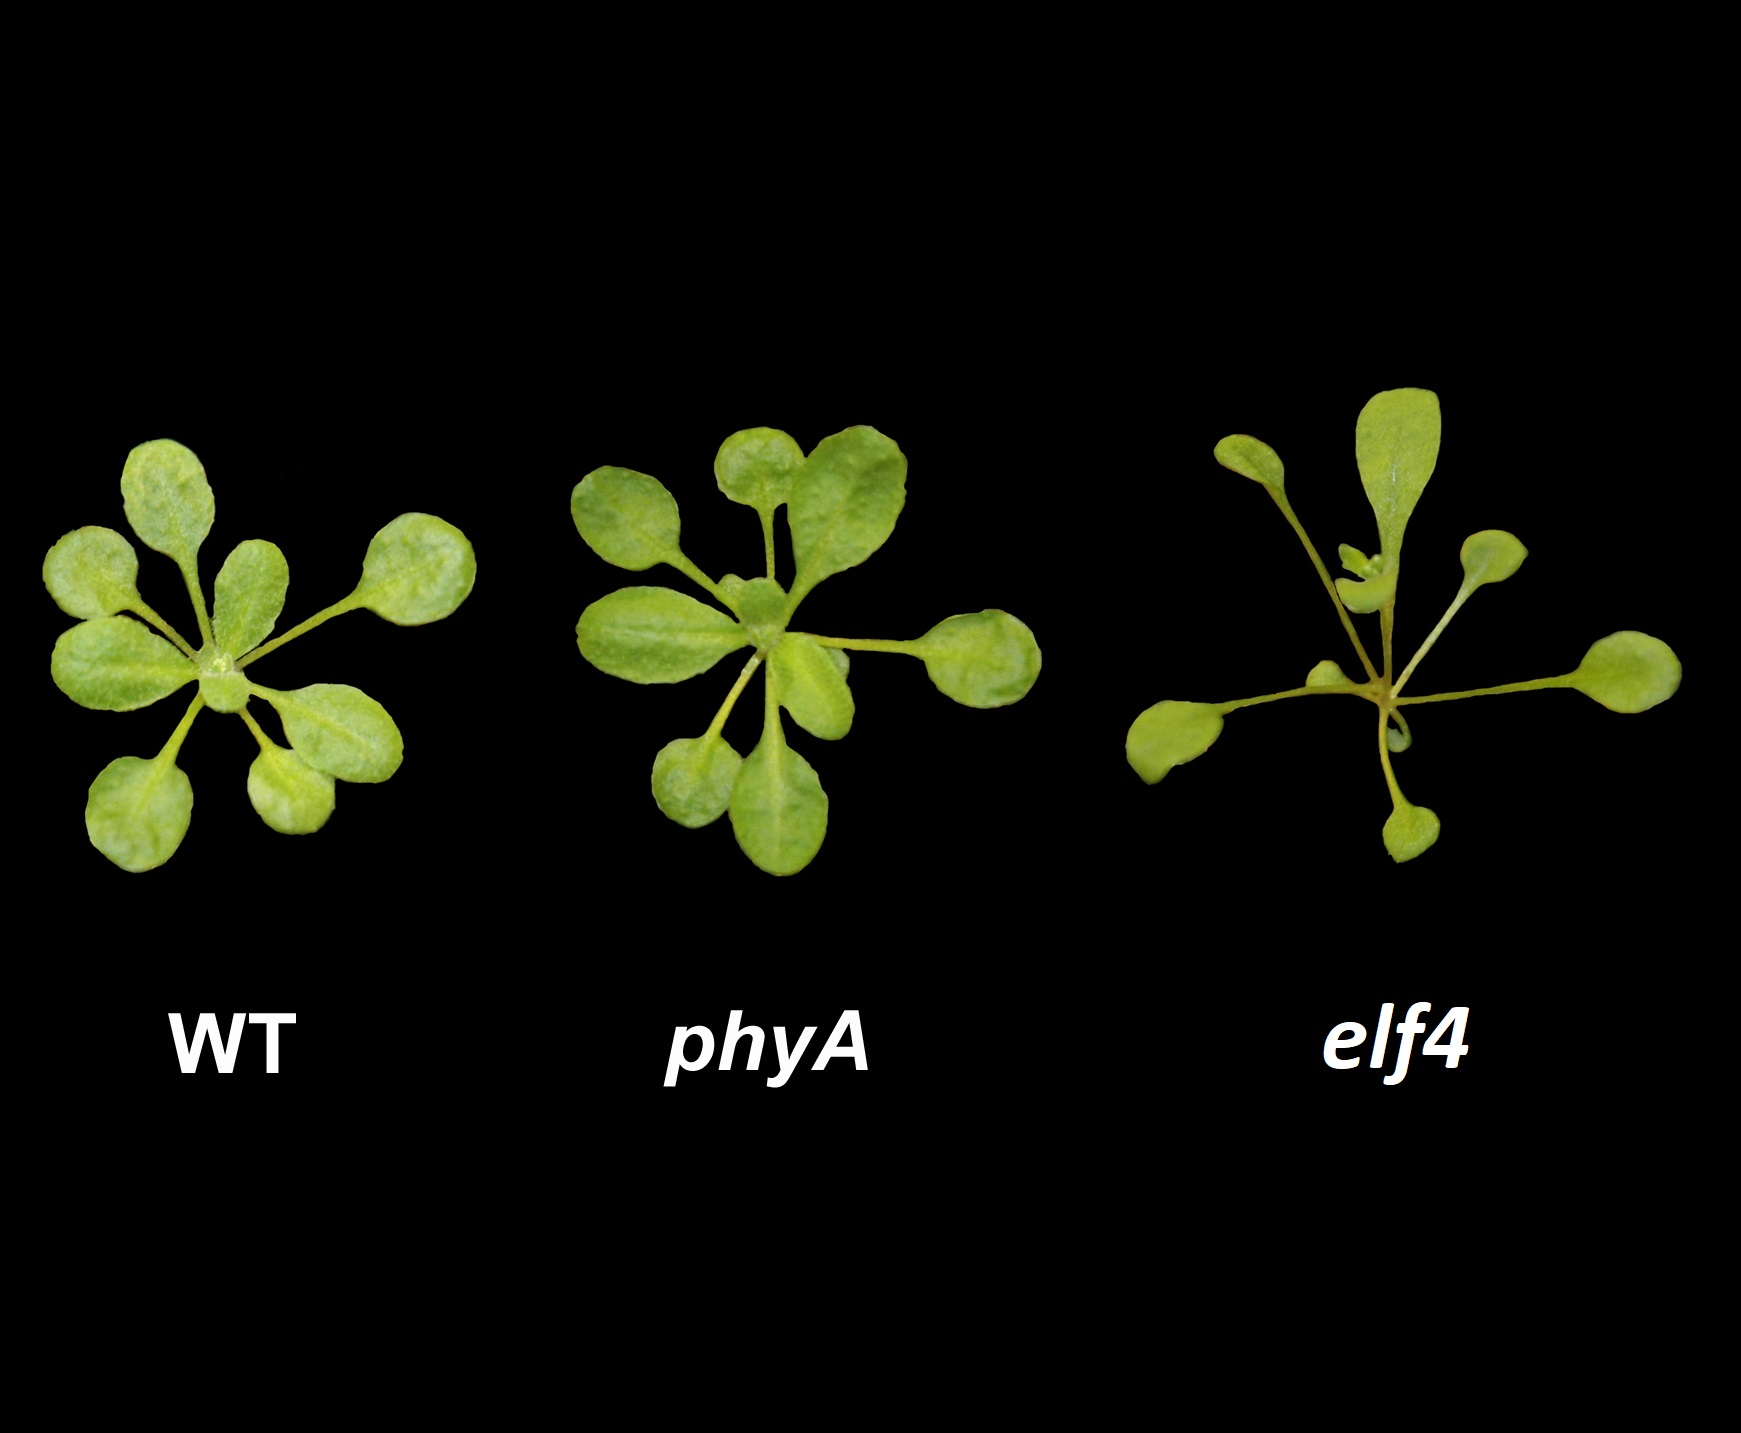

Phenotypes of 3-week-old plants

**Experiment details:**  
Growth protocol: https://bio-protocol.org/bio101/e126  
Measurement protocols: Chlorophyll and starch assay (https://doi.org/10.1038/nprot.2009.12), Quantification of starch (https://doi.org/10.1038/nprot.2006.232)
* Metabolites reported per g of fresh weight of 6-week-old plant leaf rosettes
* Study date range: 2019-12-05 to 2020-01-05
* SD = short days 6h light
* LD = long days 18h light

**Tested lines:**
* WT
* PhyA-211 
* elf4

---

> This file is part of the Jupyter Notebook 
> lesson within the [FAIR in (biological) practice DataCarpentry](https://carpentries-incubator.github.io/fair-bio-practice/)
> course run by Ed-DaSH.     

---

In [ ]:
#################################################
#                                               #
# Hashtags are not run as code and are used for #
# annotation of code in R.                      #
#################################################

# load required libraries
library(ggplot2)

# load data frame with 'fake' data for each genotype
df <- read.delim(file = "light_results.txt", stringsAsFactors=TRUE, header = TRUE, sep = "\t", dec = ".")

In [ ]:
# print data frame
df

**Table 1:** Genotypes (WT = wild type, PhyA-211, elf4-101) are listed with respective measurements for biomas (g), starch (mg/g FW), sucrose (mg/g FW) and chlorophyll  (mg/g FW)under short- and long-day light regimes.

**Note:**
Not all measurements could be recorded for chlorophyl, as at one timepoint the building fire alarm went off and research labs had to be evacuated when chlorophyll short-day time measurements were due. Three data points for PhyA-211 chlorophyll on long-day light regimes are not available as the extraction assay failed.

# Visualise data

In [ ]:
# Create ggplot subset by light_condition

# first change order of factors of the genotype table
# ggplots standard setting is set to alphabetical order so your plot would read elf, phyA, WT
# If you rerun the code with a hashtag in front of the line you can look
# at the difference in the plot!
df$genotype <- factor(df$genotype, levels = c("WT", "PhyA-211","elf4-101"))

# change size of plot so it fits the screen before plotting
options(repr.plot.width = 5, repr.plot.height = 4)

# plot your graph
ggplot(subset(df, light_condition %in% "SD"), # subset only SD from light condition column for plotting
       mapping = aes(x = genotype, y = biomas, fill = genotype)) + # x-axis shows genotype, y-axis shows biomas
    geom_boxplot(alpha=0.3) +
    labs(title = "Biomas per Genotype on short days",
        x = "Genotype", # Title of x-axis
        y = "Biomas (g)") + # Title of y-axis
    scale_fill_manual(values=c("#999999", "#E69F00", "#56B4E9")) + # change colour of groups
    theme_bw() +
    theme(legend.position="none")

# ggsave: save the last ggplot
ggsave("genotype_by_biomas.png")

**Figure 1** Biomas (g) per genotype on short days shows a much larger biomas production in PhyA-211 in comparison to wild-type. Elf4-101 has a marginally smaller biomas production than wild-type during short days.

To quantify this we have explored our data and run a ONE-way ANOVA plus Tukey multiple pairwise test.

# Statistical testing

In [ ]:
# Run a one way anova - compute the variance of biomas between genotypes
# ONLY from data within short-day light condition
res.aov <- aov(biomas ~ genotype, data = subset(df, light_condition %in% "SD"))

In [ ]:
# Summary of the analysis
summary(res.aov)

**NOTE** The output includes the columns F value and Pr(>F) corresponding to the p-value of the test.

Given the above p-value in the summary, we can conclude that there are significant differences between the groups highlighted with (&#42;) in the model summary. To find out which groups differ from each other, we conduct a Tukey post-hoc test to find between which groups these differences lie.

In [ ]:
# conduct Tukey multiple pairwise-comparison
TukeyHSD(res.aov)

**NOTE**  
* diff: difference between means of the two groups
* lwr, upr: the lower and the upper end point of the confidence interval at 95% (default)
* p adj: p-value after adjustment for the multiple comparisons.

**RESULT**  
We can see that PhyA-211 and WT are not statistically different.
Whilst elf4-101 and WT also do not differ statistically, there is a significant difference in biomas between elf4-101 and PhyA-211 (&#42;).